love is an accident, wating to happen!

In [ ]:
import numpy as np


class GaussianNaiveBayes:
    def fit(self, X, y):
        """
        Fit the model.

        Parameters:
        X (numpy array): Training data
        y (numpy array): Target values
        """
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Calculate mean, var, and priors for each class
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes)

        for idx, c in enumerate(self._classes): 
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        """
        Predict target values.

        Parameters:
        X (numpy array): Test data

        Returns:
        y_pred (numpy array): Predicted target values
        """
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        """
        Helper function to predict a single sample.

        Parameters:
        x (numpy array): Single sample

        Returns:
        predicted class
        """
        posteriors = []
        for idx, _ in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        """
        Calculate Probability Density Function (PDF) for a given class.

        Parameters:
        class_idx (int): Index of the class
        x (numpy array): Single sample

        Returns:
        PDF values
        """
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Example usage:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

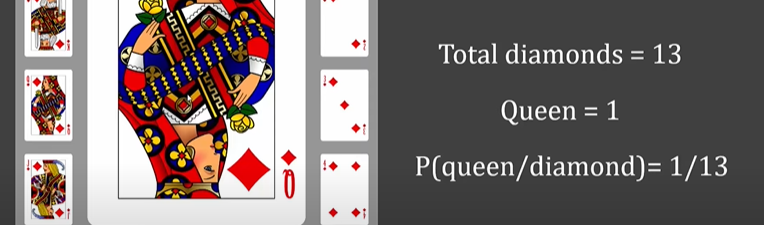

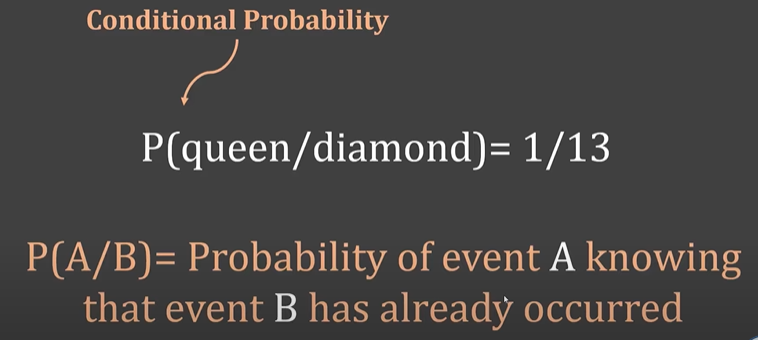

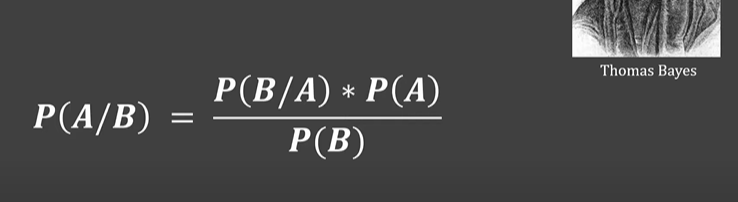

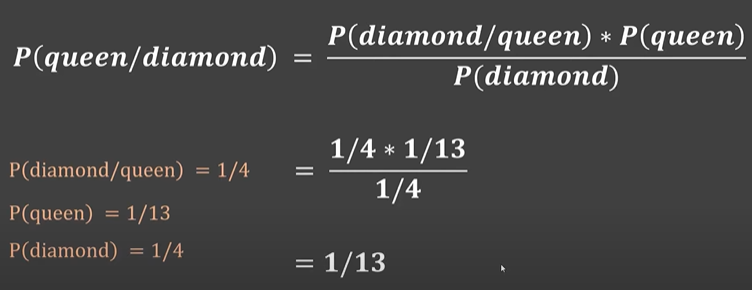

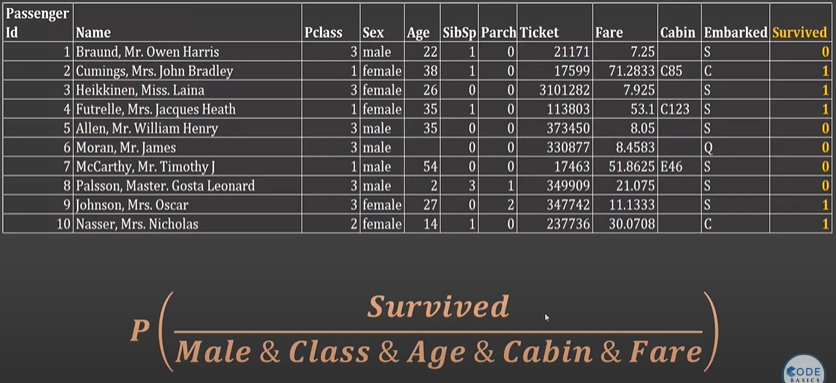

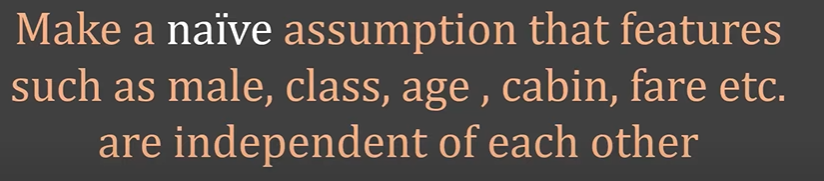

In [1]:

import pandas as pd

In [46]:

df = pd.read_csv("titanik.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             1
SibSp           0
Parch           0
Ticket          0
Fare            2
Cabin          14
Embarked        8
dtype: int64

In [48]:
df.PassengerId.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [49]:
df.Age.unique()

array([22., 38., 26., 35., nan, 54.,  2., 27., 14., 40., 58., 25., 39.,
       62., 47.,  6.])

In [31]:
df['Age']

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10    40.0
11    58.0
12    26.0
13    25.0
14    39.0
15    62.0
16    47.0
17     6.0
18    47.0
Name: Age, dtype: float64

In [36]:
import numpy as np

In [38]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
df.Age = df.Age.fillna(df['Age'].median())

In [41]:

df.Age = df.Age.fillna(df.Age.mean())

In [45]:
df.Age

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     33.5
6     54.0
7      2.0
8     27.0
9     14.0
10    40.0
11    58.0
12    26.0
13    25.0
14    39.0
15    62.0
16    47.0
17     6.0
18    47.0
Name: Age, dtype: float64

In [9]:
df.Survived.unique()

array([0, 1])

In [10]:
df.Pclass.unique()

array([3, 1, 2])

In [11]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [12]:
df.SibSp.unique()

array([1, 0, 3, 4])

In [13]:
df.Parch.unique()


array([0, 1, 2])

In [14]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', '396079',
       '113783', 'A/5. 2151', '330969', '376539', '240276', '3703',
       '240423', '240433'], dtype=object)

In [15]:
df.Fare.unique()

array([ 7.25  , 71.2833,  7.925 , 53.1   ,  8.05  ,  8.725 , 51.8625,
       21.075 , 11.1333, 30.0708, 23.45  , 30.6958,  9.8375,  7.75  ,
        0.    ,     nan, 29.7   ])

In [16]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'W.E'], dtype=object)

In [17]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# Trim spaces from all columns
df = df.map(lambda x: x.strip() if type(x)==str else x)

In [20]:
# Remove tab characters from all columns replace \t with space that is null value
df = df.map(lambda x: x.replace('\t', '') if type(x) == str else x)

In [21]:
# Remove tab characters from Ticket columns
df = df.Ticket.apply(lambda x: [y.replace('\t', '') if type(y) == str else y for y in x])

In [74]:
df_c = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1) # inplace =True
df_c.head()


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
inputs = df_c.drop('Survived',axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [84]:
target = df_c.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [85]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [86]:
inputs.Sex = inputs.Sex.map({'male':1,'female':0})

In [87]:
inputs.Sex

0     1
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    0
17    1
18    0
Name: Sex, dtype: int64

In [88]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(5)

,Pclass,Sex,Age,Fare,female,male
0,3,1,22.0,7.2500,False,True
1,1,0,38.0,71.2833,True,False
2,3,0,26.0,7.9250,True,False
3,1,0,35.0,53.1000,True,False
4,3,1,35.0,8.0500,False,True



I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female

In [89]:

inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [90]:
inputs.columns[inputs.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [91]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [92]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [98]:
inputs.Fare = inputs.Fare.fillna(inputs.Age.median())

In [99]:
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [101]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [102]:
model.fit(X_train, y_train)

GaussianNB()

In [103]:

model.score(X_test,y_test)

0.5

In [104]:

X_test[0:10]

,Pclass,Age,Fare,female
6,1,54.0,51.8625,False
12,3,26.0,8.0500,False
9,2,14.0,30.0708,True
15,2,62.0,0.0000,False
13,3,25.0,9.8375,True
4,3,35.0,8.0500,False


In [105]:
y_test[0:10]

6     0
12    0
9     1
15    0
13    0
4     0
Name: Survived, dtype: int64

In [106]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 0])

In [107]:

model.predict_proba(X_test[:10])

array([[0.00000000e+00, 1.00000000e+00],
       [9.99999938e-01, 6.20406696e-08],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999648e-01, 3.51675530e-07]])

In [108]:
from sklearn.model_selection import cross_val_score


In [109]:
cross_val_score(GaussianNB(), X_train, y_train)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


array([1.        , 0.66666667, 1.        , 0.5       , 1.        ])

part2

In [115]:
dfm = pd.read_csv("message.csv")
dfm.head()

,Message,Label
0,"Hello, I hope you're doing well. I wanted to r...",Ham
1,"Make $10,000 in just one week! Click here to l...",Spam
2,I'm running late for our 2 PM meeting today. S...,Ham
3,Get 50% off on all products! Limited time offe...,Spam
4,We've been selected for the final round of the...,Ham


In [116]:
dfm.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
Ham        19     18  Join our webinar on industry trends. Register ...    2
Spam       20     18  Unlock exclusive deals on our best-selling pro...    2

In [117]:
dfm['Label'] = df['Label'].apply(lambda x: 1 if x=='Spam' else 0)

In [118]:
dfm.head()

,Message,Label
0,"Hello, I hope you're doing well. I wanted to r...",0
1,"Make $10,000 in just one week! Click here to l...",1
2,I'm running late for our 2 PM meeting today. S...,0
3,Get 50% off on all products! Limited time offe...,1
4,We've been selected for the final round of the...,0


In [119]:

from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Label)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

convert text to vector

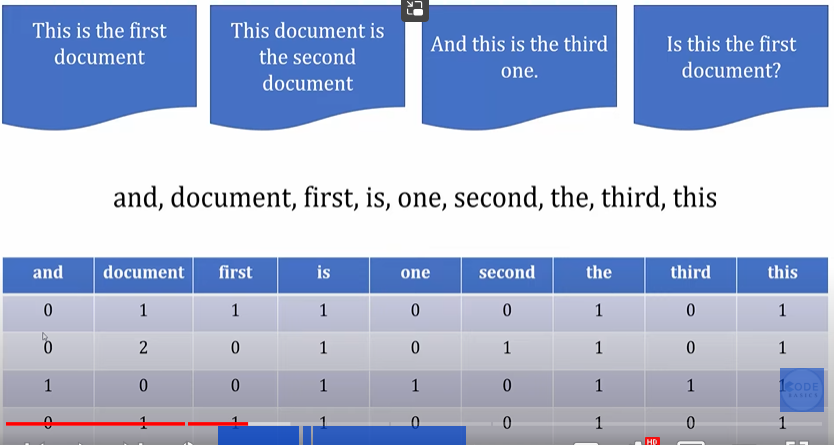

In [124]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values) #convert to vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 331 stored elements and shape (29, 141)>

In [128]:
print(X_train_count) 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 331 stored elements and shape (29, 141)>
  Coords	Values
  (0, 69)	1
  (0, 1)	1
  (0, 0)	1
  (0, 55)	1
  (0, 64)	1
  (0, 81)	1
  (0, 135)	1
  (0, 23)	1
  (0, 51)	1
  (0, 124)	1
  (0, 67)	1
  (0, 53)	1
  (0, 54)	1
  (0, 37)	1
  (0, 25)	1
  (1, 54)	1
  (1, 37)	1
  (1, 25)	1
  (1, 44)	1
  (1, 3)	1
  (1, 78)	1
  (1, 80)	1
  (1, 7)	1
  (1, 28)	2
  (1, 68)	1
  :	:
  (26, 24)	1
  (26, 111)	1
  (26, 83)	1
  (26, 86)	1
  (26, 43)	1
  (27, 54)	1
  (27, 37)	1
  (27, 25)	1
  (27, 140)	1
  (27, 6)	1
  (27, 49)	1
  (27, 13)	1
  (27, 26)	1
  (27, 105)	2
  (27, 87)	1
  (28, 124)	1
  (28, 29)	1
  (28, 84)	1
  (28, 139)	1
  (28, 48)	1
  (28, 15)	1
  (28, 118)	1
  (28, 66)	1
  (28, 138)	1
  (28, 47)	1


In [129]:
X_train_count.toarray() #convert to vector to array

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [130]:

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)


MultinomialNB()

In [131]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

In [135]:
emails_count =v.transform(emails)
print(emails_count)


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (2, 141)>
  Coords	Values
  (0, 44)	1
  (0, 124)	1
  (0, 126)	1
  (1, 3)	1
  (1, 39)	1
  (1, 41)	1
  (1, 64)	1
  (1, 79)	1
  (1, 80)	1
  (1, 139)	1


In [136]:
model.predict(emails_count)

array(['Ham', 'Spam'], dtype='<U4')

sklearn pipeline

In [137]:
from sklearn.pipeline import Pipeline

In [138]:
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [139]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [140]:
pipe.score(X_test,y_test)

1.0

In [141]:
pipe.predict(emails)

array(['Ham', 'Spam'], dtype='<U4')